# Wind Turbine Energy EDA 

In this notebook, we will read in the manually collected wind turbine data from `Wind Turbine Information Clean.csv` and plot some curves for known energy power curves and impute values for turbines that are missing values.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS 663 - Project/Wind Turbine Information Clean.csv')
df

,Manufacturer,Model,Rated Power (kW),Cut-in Wind Speed (m/s),Rated Wind Speed (m/s),Cut-out Wind Speed (m/s),Rotor Diameter (m),Swept Area (m^2),Power Density 1 (W/m^2),Power Density 2 (m^2/kW),...,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5
0,GE Wind,GE1.7-100,1700.0,3.0,10.0,23.0,100.0,7854.00,216.5,4.60,...,1700.0,1700.00,1700.0,1700.0,1700.0,1700.0,1700.0,1700.00,1700.0,1700.0
1,NEG Micon,NM19,108.0,4.0,14.0,30.0,18.9,280.55,385.7,2.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Endurance,E-3120,50.0,3.5,10.0,25.0,19.2,290.00,172.4,5.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NEG Micon,NM48,750.0,4.0,16.0,25.0,48.2,1824.00,411.2,2.40,...,749.7,735.10,715.5,706.3,697.2,692.9,683.3,652.80,NaN,NaN
4,PowerWind,PW56-900,900.0,3.0,12.5,25.0,56.0,2463.00,365.4,2.70,...,900.0,900.00,900.0,900.0,900.0,900.0,900.0,900.00,900.0,900.0
5,Aeronautica,47-750,750.0,3.5,14.5,25.0,47.0,1735.00,432.3,2.30,...,750.0,750.00,750.0,750.0,750.0,750.0,750.0,750.00,750.0,750.0
6,GE Wind,GE1.5-77,1500.0,3.5,12.0,25.0,77.0,4657.00,322.1,3.10,...,1500.0,1500.00,1500.0,1500.0,1500.0,1500.0,1500.0,1500.00,1500.0,1500.0
7,GE Wind,GE2.7-116,2700.0,3.0,NaN,NaN,116.0,10660.00,253.3,3.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GE Wind,GE2.82-127,2800.0,3.0,8.0,25.0,127.0,12667.00,221.0,4.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,GE Wind,GE1.85-82.5,1850.0,3.0,13.0,25.0,82.5,5346.00,346.1,2.90,...,1850.0,1850.00,1850.0,1850.0,1850.0,1850.0,1850.0,1850.00,1850.0,1850.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              25 non-null     object 
 1   Model                     25 non-null     object 
 2   Rated Power (kW)          24 non-null     float64
 3   Cut-in Wind Speed (m/s)   23 non-null     float64
 4   Rated Wind Speed (m/s)    22 non-null     float64
 5   Cut-out Wind Speed (m/s)  22 non-null     float64
 6   Rotor Diameter (m)        23 non-null     float64
 7   Swept Area (m^2)          23 non-null     float64
 8   Power Density 1 (W/m^2)   23 non-null     float64
 9   Power Density 2 (m^2/kW)  23 non-null     float64
 10  Hub Height (m)            22 non-null     object 
 11  0                         19 non-null     float64
 12  0.5                       19 non-null     float64
 13  1                         19 non-null     float64
 14  1.5         

In [ ]:
df.describe()

,Rated Power (kW),Cut-in Wind Speed (m/s),Rated Wind Speed (m/s),Cut-out Wind Speed (m/s),Rotor Diameter (m),Swept Area (m^2),Power Density 1 (W/m^2),Power Density 2 (m^2/kW),0,0.5,...,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5
count,24.000000,23.000000,22.000000,22.000000,23.000000,23.000000,23.000000,23.000000,19.0,19.0,...,17.000000,16.000000,17.000000,16.00000,17.000000,16.000000,17.000000,16.000000,16.000000,15.000000
mean,1296.375000,3.439130,12.972727,24.727273,67.778261,4530.371739,327.682609,3.251739,0.0,0.0,...,1349.176471,1416.723750,1346.905882,1414.98750,1345.523529,1414.181250,1344.347059,1267.892500,1241.506250,1308.733333
std,987.894635,0.435618,2.055696,1.723281,34.965073,3770.302424,79.438282,0.910937,0.0,0.0,...,836.082272,813.609955,838.011997,815.14935,839.309481,815.883925,840.488370,853.171255,879.582473,866.863844
min,50.000000,3.000000,8.000000,20.000000,16.500000,213.000000,172.400000,2.100000,0.0,0.0,...,149.000000,149.000000,149.000000,149.00000,149.000000,149.000000,149.000000,0.000000,0.000000,0.000000
25%,243.750000,3.000000,12.125000,25.000000,38.050000,1199.500000,285.200000,2.650000,0.0,0.0,...,749.700000,746.275000,715.500000,739.07500,697.200000,735.725000,683.300000,658.200000,552.775000,705.000000
50%,1250.000000,3.500000,13.000000,25.000000,77.000000,4657.000000,337.800000,3.000000,0.0,0.0,...,1500.000000,1600.000000,1500.000000,1600.00000,1500.000000,1600.000000,1500.000000,1250.000000,1250.000000,1500.000000
75%,2112.500000,4.000000,14.375000,25.000000,92.750000,6756.500000,372.900000,3.515000,0.0,0.0,...,1850.000000,1887.500000,1850.000000,1887.50000,1850.000000,1887.500000,1850.000000,1812.500000,1812.500000,1825.000000
max,3000.000000,4.000000,16.500000,30.000000,127.000000,12667.000000,471.700000,5.800000,0.0,0.0,...,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000


In [ ]:
import seaborn as sns

All Vestas turbines have power energy curves. So we can simply plot them out below.

In [ ]:
vestas_df = df[df.Manufacturer == 'Vestas']
vestas_df

,Manufacturer,Model,Rated Power (kW),Cut-in Wind Speed (m/s),Rated Wind Speed (m/s),Cut-out Wind Speed (m/s),Rotor Diameter (m),Swept Area (m^2),Power Density 1 (W/m^2),Power Density 2 (m^2/kW),...,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5
11,Vestas,V47-0.66,660.0,4.0,15.0,25.0,47.0,1735.0,380.4,2.60,...,660.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0
12,Vestas,V90-1.8,1800.0,3.0,13.0,25.0,90.0,6362.0,282.9,3.54,...,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0
13,Vestas,V90-3.0,3000.0,3.5,16.5,25.0,90.0,6362.0,471.5,2.10,...,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
14,Vestas,V80-1.8,1800.0,4.0,15.0,25.0,80.0,5027.0,358.1,2.80,...,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0


In [ ]:
vestas_t_df = vestas_df.T
vestas_t_headers = vestas_t_df.iloc[1,:]
vestas_t_df = vestas_t_df.iloc[11:,:]
vestas_t_df.columns = vestas_t_headers
vestas_t_df

Model,V47-0.66,V90-1.8,V90-3.0,V80-1.8
0,0.0,0.0,0.0,0.0
0.5,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
1.5,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
2.5,0.0,0.0,0.0,0.0
3,0.0,10.0,0.0,0.0
3.5,0.0,20.0,38.0,0.0
4,4.68,46.0,77.0,11.43
4.5,24.24,110.0,133.0,60.22


<Axes: xlabel='None', ylabel='V47-0.66'>

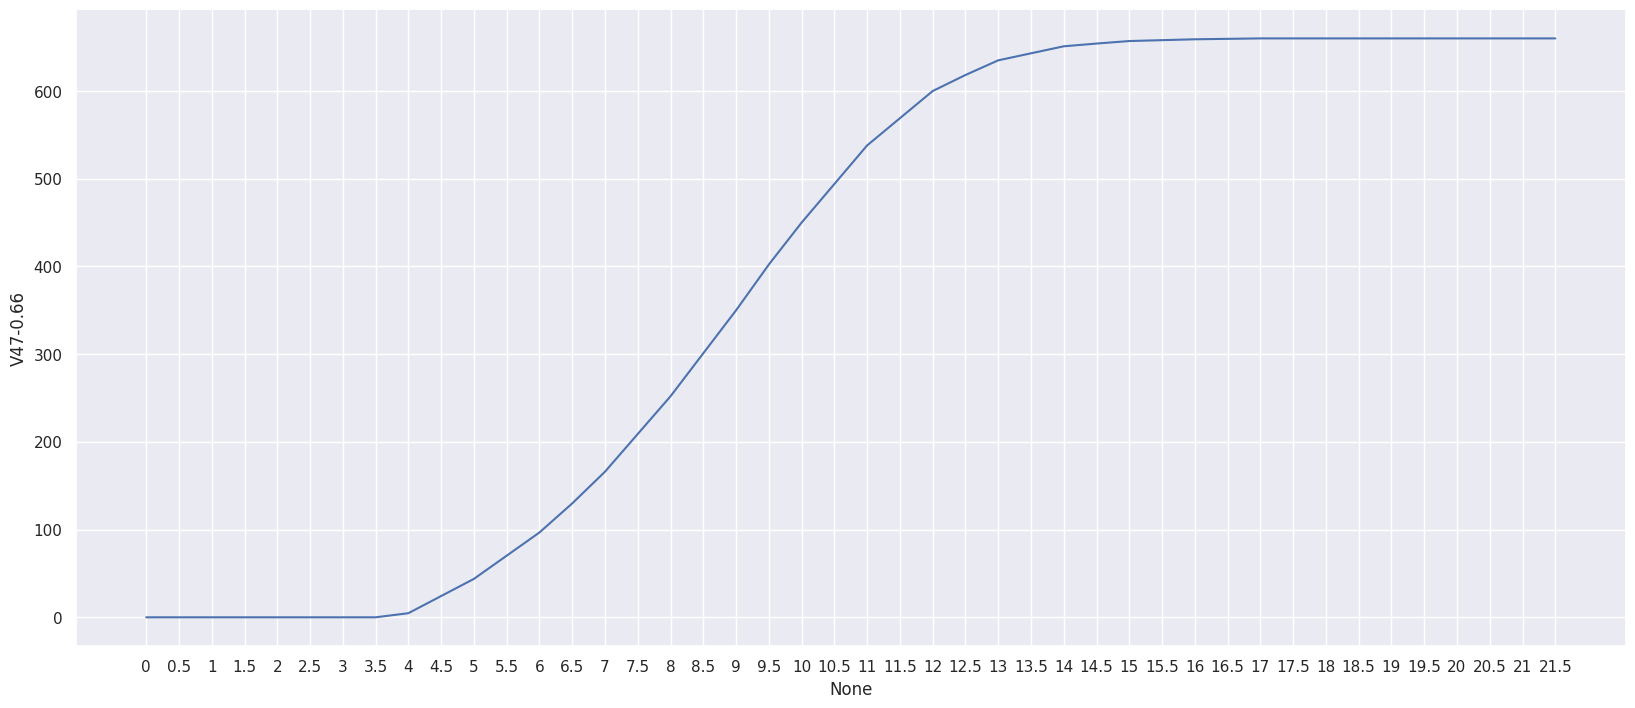

In [ ]:
sns.lineplot(data=vestas_t_df, x=vestas_t_df.index, y=vestas_t_df['V47-0.66'])

[Text(0.5, 1.0, 'Vestas Power Curve'),
 Text(0.5, 0, 'Wind Speed (m/s)'),
 Text(0, 0.5, 'Power (kW)')]

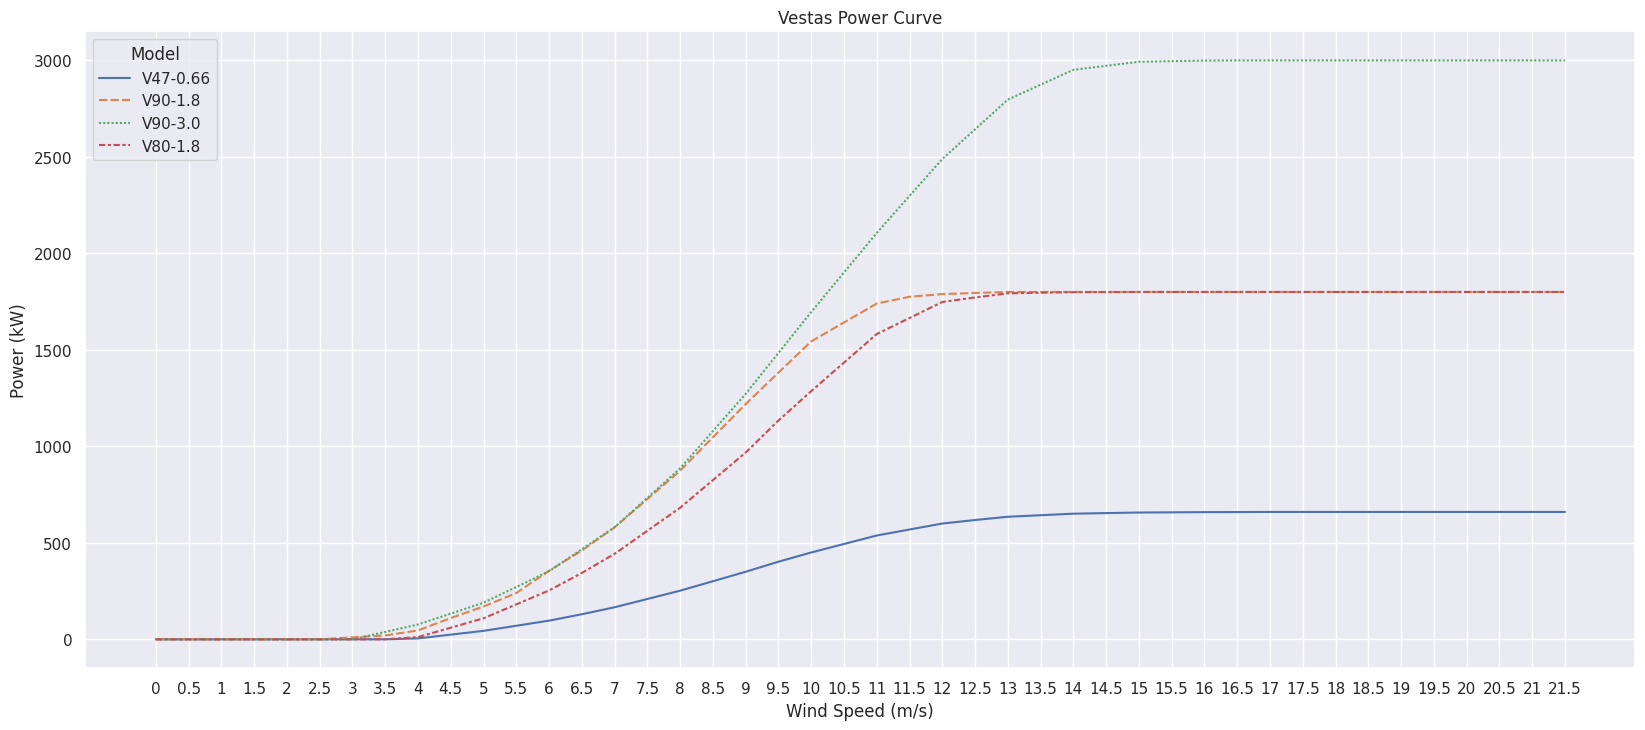

In [ ]:
sns.set_theme(rc={'figure.figsize':(20,8.27)})

plot = sns.lineplot(data=vestas_t_df)
plot.set(title='Vestas Power Curve', xlabel='Wind Speed (m/s)', ylabel = 'Power (kW)')

We will now look at GE turbines. Some are missing values, so we will try to fit a sigmoid curves on them.

In [ ]:
import numpy as np

ge_df = df[df.Manufacturer == 'GE Wind']
ge_df

,Manufacturer,Model,Rated Power (kW),Cut-in Wind Speed (m/s),Rated Wind Speed (m/s),Cut-out Wind Speed (m/s),Rotor Diameter (m),Swept Area (m^2),Power Density 1 (W/m^2),Power Density 2 (m^2/kW),...,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5
0,GE Wind,GE1.7-100,1700.0,3.0,10.0,23.0,100.0,7854.0,216.5,4.6,...,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0
6,GE Wind,GE1.5-77,1500.0,3.5,12.0,25.0,77.0,4657.0,322.1,3.1,...,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0
7,GE Wind,GE2.7-116,2700.0,3.0,NaN,NaN,116.0,10660.0,253.3,3.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GE Wind,GE2.82-127,2800.0,3.0,8.0,25.0,127.0,12667.0,221.0,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,GE Wind,GE1.85-82.5,1850.0,3.0,13.0,25.0,82.5,5346.0,346.1,2.9,...,1850.0,1850.0,1850.0,1850.0,1850.0,1850.0,1850.0,1850.0,1850.0,1850.0
10,GE Wind,GE2.3-116,2300.0,3.0,10.4,22.0,116.0,10569.0,217.6,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ge_df['Rated Wind Speed (m/s)'].mean()

10.68

In [ ]:
ge_df['Cut-out Wind Speed (m/s)'].mean()

24.0

In [ ]:
df.loc[7, 'Rated Wind Speed (m/s)'] = ge_df['Rated Wind Speed (m/s)'].mean()
df.loc[7, 'Cut-out Wind Speed (m/s)'] = ge_df['Cut-out Wind Speed (m/s)'].mean()
df.loc[7,:]

Manufacturer                  GE Wind
Model                       GE2.7-116
Rated Power (kW)               2700.0
Cut-in Wind Speed (m/s)           3.0
Rated Wind Speed (m/s)          10.68
Cut-out Wind Speed (m/s)         24.0
Rotor Diameter (m)              116.0
Swept Area (m^2)              10660.0
Power Density 1 (W/m^2)         253.3
Power Density 2 (m^2/kW)          3.9
Hub Height (m)               80/90/94
0                                 NaN
0.5                               NaN
1                                 NaN
1.5                               NaN
2                                 NaN
2.5                               NaN
3                                 NaN
3.5                               NaN
4                                 NaN
4.5                               NaN
5                                 NaN
5.5                               NaN
6                                 NaN
6.5                               NaN
7                                 NaN
7.5         

In [ ]:
x_vals = [float(x) for x in ge_df.loc[0,'0':'21.5'].index.tolist()]
y_vals = ge_df.loc[0,'0':'21.5'].tolist()

In [ ]:
y_vals

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 40.0,
 100.0,
 195.0,
 303.0,
 424.0,
 545.0,
 687.0,
 829.0,
 1015.0,
 1201.0,
 1370.0,
 1535.0,
 1647.0,
 1687.0,
 1698.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0,
 1700.0]

Below code came from below sources:
https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
https://stackoverflow.com/questions/50786145/scipy-sigmoid-curve-fitting
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fsigmoid(x, L, a, b):
    return L / (1.0 + np.exp(-a*(x-b)))

popt, pcov = curve_fit(fsigmoid, x_vals, y_vals)

print('popt: ', popt)
print('pcov: ', pcov)

popt:  [ 868.13793146 -234.59364669   14.28803117]
pcov:  [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


<ipython-input-163-fded7441df01>:5: RuntimeWarning: overflow encountered in exp
  return L / (1.0 + np.exp(-a*(x-b)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<ipython-input-163-fded7441df01>:5: RuntimeWarning: overflow encountered in exp
  return L / (1.0 + np.exp(-a*(x-b)))


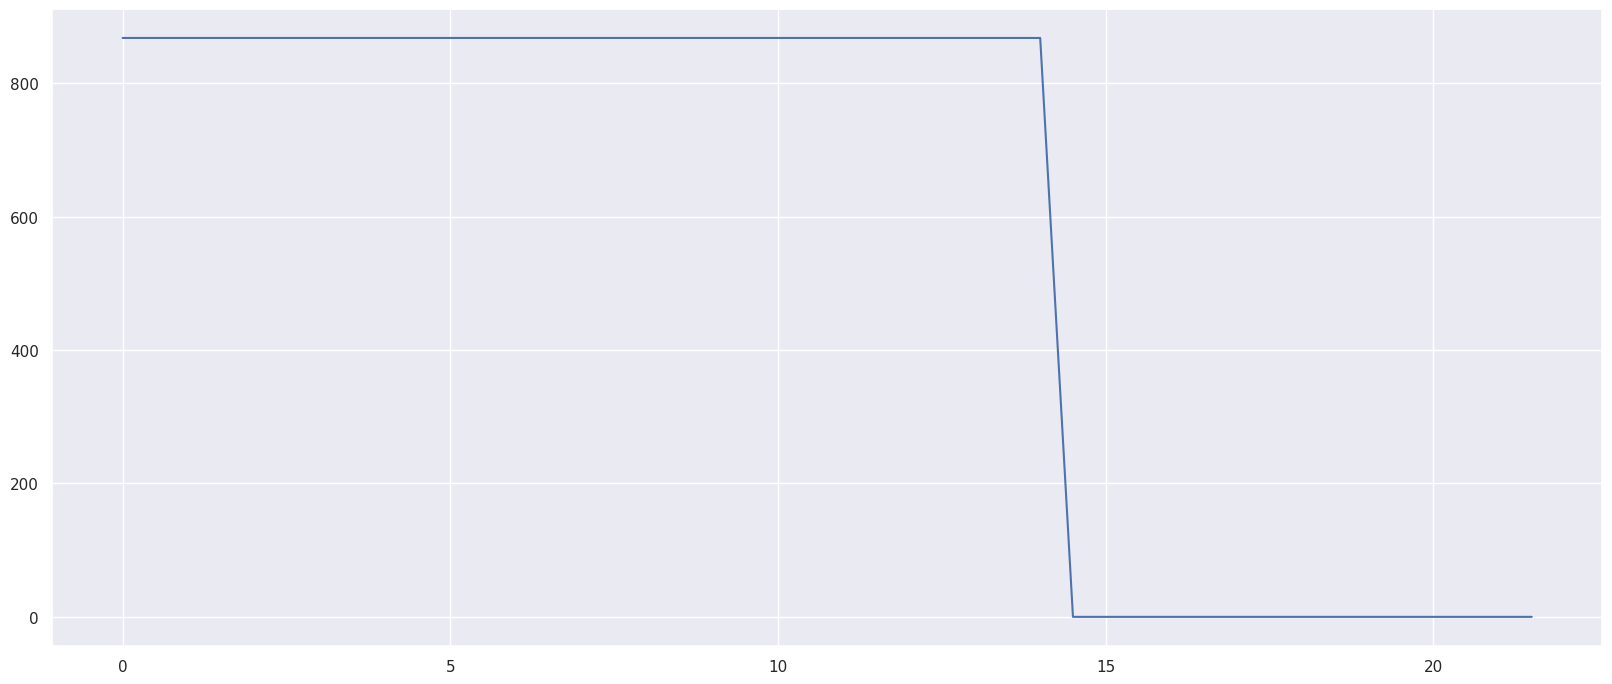

In [ ]:
x_values = x_vals
# y_values = [fsigmoid(x, popt, pcov) for x in x_values]

plt.plot(x_values, fsigmoid(x_values, *popt))

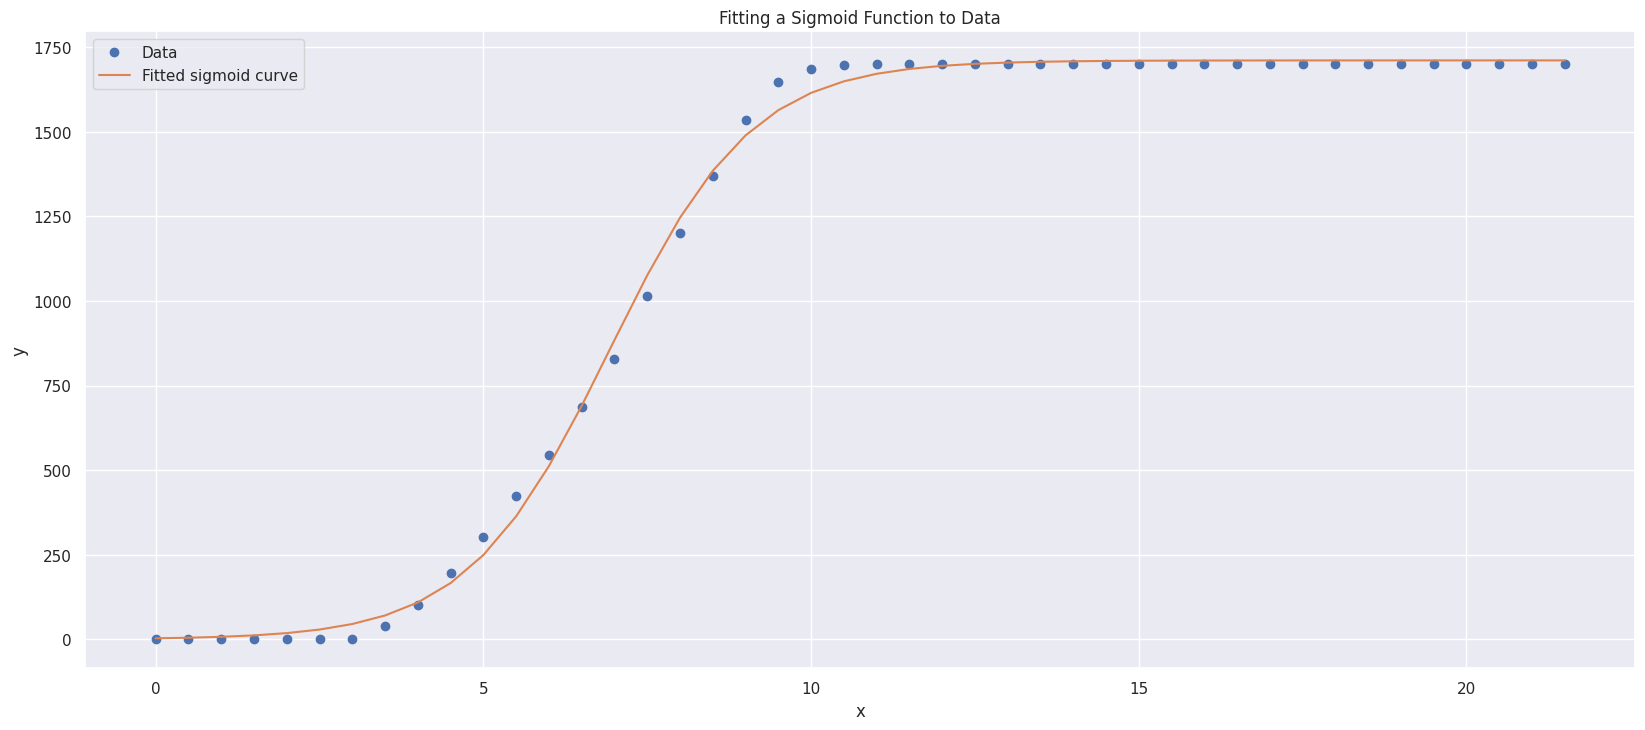

Fitted parameters:
L = 1711.452538249505
k = 0.918739335191069
x0 = 6.9262093355464165


In [ ]:
from scipy.optimize import curve_fit

# Sigmoid function
def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Initial guess for parameters
initial_guess = [max(y_vals), 0.1, 10.0]  # Adjust these values as needed

# Perform curve fitting
popt, pcov = curve_fit(sigmoid, x_vals, y_vals, p0=initial_guess)

# Extract fitted parameters
L_fit, k_fit, x0_fit = popt

# Generate y values using the fitted parameters
y_fit = sigmoid(x_vals, L_fit, k_fit, x0_fit)

# Plot the original data and the fitted sigmoid curve
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, y_fit, label='Fitted sigmoid curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting a Sigmoid Function to Data')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters
print("Fitted parameters:")
print("L =", L_fit)
print("k =", k_fit)
print("x0 =", x0_fit)


In [ ]:
# Generate y values using the fitted parameters
y_2700_fit = sigmoid(x_vals, 2700, k_fit, x0_fit)
y_2800_fit = sigmoid(x_vals, 2800, k_fit, x0_fit)
y_2300_fit = sigmoid(x_vals, 2300, k_fit, x0_fit)

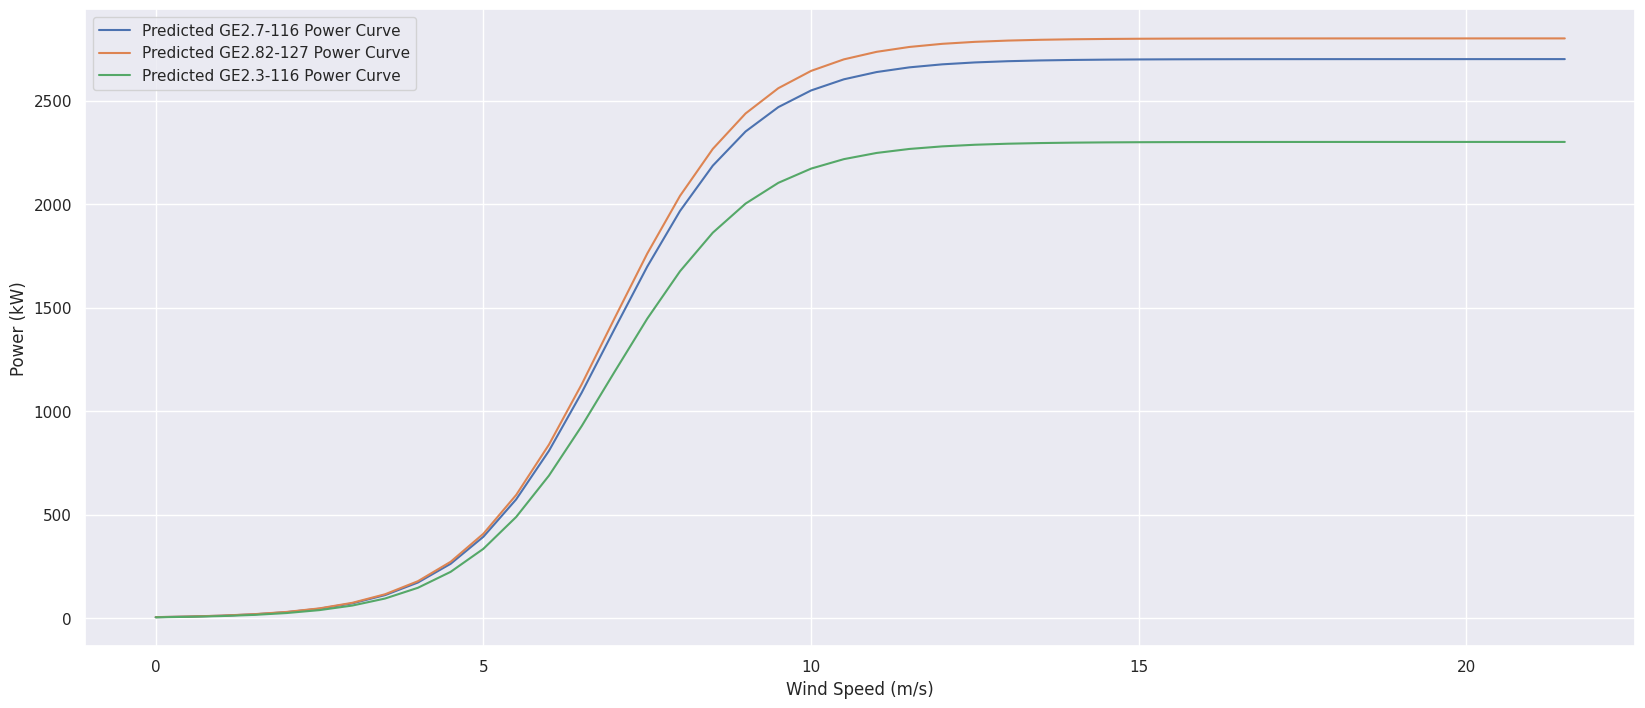

In [ ]:
plt.plot(x_vals, y_2700_fit, label='Predicted GE2.7-116 Power Curve')
plt.plot(x_vals, y_2800_fit, label='Predicted GE2.82-127 Power Curve')
plt.plot(x_vals, y_2300_fit, label='Predicted GE2.3-116 Power Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

Once we have the plots and can confirm that the curves are reasonable, we just have to fill in the dataframe.

In [ ]:
i = 0
for x in ge_df.loc[0,'0':'21.5'].index.tolist():
  if float(x) >= 3:
    df.loc[7, x] = y_2700_fit[i]# 2.7
    df.loc[8, x] = y_2800_fit[i]# 2.82
    df.loc[10, x] = y_2300_fit[i]# 2.3
  else:
    df.loc[7, x] = 0.0 # 2.7
    df.loc[8, x] = 0.0 # 2.82
    df.loc[10, x] = 0.0
  i += 1

df

,Manufacturer,Model,Rated Power (kW),Cut-in Wind Speed (m/s),Rated Wind Speed (m/s),Cut-out Wind Speed (m/s),Rotor Diameter (m),Swept Area (m^2),Power Density 1 (W/m^2),Power Density 2 (m^2/kW),...,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5
0,GE Wind,GE1.7-100,1700.0,3.0,10.00,23.0,100.0,7854.00,216.5,4.60,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
1,NEG Micon,NM19,108.0,4.0,14.00,30.0,18.9,280.55,385.7,2.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Endurance,E-3120,50.0,3.5,10.00,25.0,19.2,290.00,172.4,5.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NEG Micon,NM48,750.0,4.0,16.00,25.0,48.2,1824.00,411.2,2.40,...,749.700000,735.100000,715.500000,706.300000,697.200000,692.900000,683.300000,652.800000,NaN,NaN
4,PowerWind,PW56-900,900.0,3.0,12.50,25.0,56.0,2463.00,365.4,2.70,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
5,Aeronautica,47-750,750.0,3.5,14.50,25.0,47.0,1735.00,432.3,2.30,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
6,GE Wind,GE1.5-77,1500.0,3.5,12.00,25.0,77.0,4657.00,322.1,3.10,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
7,GE Wind,GE2.7-116,2700.0,3.0,10.68,24.0,116.0,10660.00,253.3,3.90,...,2699.741866,2699.836936,2699.896993,2699.934931,2699.958897,2699.974036,2699.983599,2699.989640,2699.993456,2699.995866
8,GE Wind,GE2.82-127,2800.0,3.0,8.00,25.0,127.0,12667.00,221.0,4.50,...,2799.732305,2799.830896,2799.893178,2799.932521,2799.957375,2799.973074,2799.982991,2799.989256,2799.993213,2799.995713
9,GE Wind,GE1.85-82.5,1850.0,3.0,13.00,25.0,82.5,5346.00,346.1,2.90,...,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000


In [ ]:
df[df['Model'] == 'GE2.7-116'].loc[:,['0.5','2.5','4']]

,0.5,2.5,4
7,0.0,0.0,171.881777


In [ ]:
ge_complete_df = df[df.Manufacturer == 'GE Wind']
ge_complete_df

ge_complete_t_df = ge_complete_df.T
ge_complete_t_headers = ge_complete_t_df.iloc[1,:]
ge_complete_t_df = ge_complete_t_df.iloc[11:,:]
ge_complete_t_df.columns = ge_complete_t_headers
ge_complete_t_df

Model,GE1.7-100,GE1.5-77,GE2.7-116,GE2.82-127,GE1.85-82.5,GE2.3-116
0,0.0,0.0,0.0,0.0,0.0,0.0
0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
1.5,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
2.5,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,71.312873,73.95409,6.0,60.748003
3.5,40.0,20.0,111.181456,115.299287,38.0,94.710129
4,100.0,46.33,171.881777,178.247769,75.0,146.41781
4.5,195.0,83.0,262.363335,272.080495,130.0,223.494693


The above code is successful for GE, so we will do this for all other turbines below.

In [ ]:
def find_sigmoid_curve(manufacturer, power, demo_row):
  temp_df = df[df.Manufacturer == manufacturer]
  # x_vals = [float(x) for x in temp_df.loc[0,'0':'21.5'].index.tolist()] # GE
  x_vals = [float(x) for x in temp_df.loc[demo_row,'0':'21.5'].index.tolist()] # NEG Micon
  # x_vals = [float(x) for x in temp_df.loc[0,'0':'21.5'].index.tolist()]
  # y_vals = temp_df.loc[0,'0':'21.5'].tolist() # GE
  y_vals = temp_df.loc[demo_row,'0':'21.5'].tolist() # NEG Micon
  # y_vals = temp_df.loc[26,'0':'21.5'].tolist() # Nordtank

  # Initial guess for parameters
  initial_guess = [max(y_vals), 0.1, 10.0]  # Adjust these values as needed

  # Perform curve fitting
  popt, pcov = curve_fit(sigmoid, x_vals, y_vals, p0=initial_guess)

  # Extract fitted parameters
  L_fit, k_fit, x0_fit = popt

  # Generate y values using the fitted parameters
  y_fit = sigmoid(x_vals, L_fit, k_fit, x0_fit)

  # Plot the original data and the fitted sigmoid curve
  plt.plot(x_vals, y_vals, 'o', label='Data')
  plt.plot(x_vals, y_fit, label='Fitted sigmoid curve')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Fitting a Sigmoid Function to Data')
  plt.legend()
  plt.grid(True)
  plt.show()

  new_power_curve = sigmoid(x_vals, power, k_fit, x0_fit)
  plt.plot(x_vals, new_power_curve, label='Predicted Power Curve')
  plt.xlabel('Wind Speed (m/s)')
  plt.ylabel('Power (kW)')
  plt.legend()
  plt.grid(True)
  plt.show()

  return new_power_curve

In [ ]:
import math
# def impute_intermediate_values():
temp_df = df[df.Manufacturer == 'NEG Micon']
# temp_df = temp_df.loc[24, '0':'21.5']
# temp_df

x_cols = temp_df.loc[24,'0':'21'].index.tolist()
i = 0
for x in x_cols:
  if math.isnan(temp_df.loc[24, x]):
    df.loc[24, x] = (df.loc[24, x_cols[i-1]] + df.loc[24, x_cols[i+1]]) / 2
  i += 1
  # print(temp_df.loc[24, x] == float('nan'))
# impute_intermediate_values()
df.loc[24, '21.5'] = df.loc[24, '21']
df

,Manufacturer,Model,Rated Power (kW),Cut-in Wind Speed (m/s),Rated Wind Speed (m/s),Cut-out Wind Speed (m/s),Rotor Diameter (m),Swept Area (m^2),Power Density 1 (W/m^2),Power Density 2 (m^2/kW),...,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5
0,GE Wind,GE1.7-100,1700.0,3.0,10.00,23.0,100.0,7854.00,216.5,4.60,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
1,NEG Micon,NM19,108.0,4.0,14.00,30.0,18.9,280.55,385.7,2.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Endurance,E-3120,50.0,3.5,10.00,25.0,19.2,290.00,172.4,5.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NEG Micon,NM48,750.0,4.0,16.00,25.0,48.2,1824.00,411.2,2.40,...,749.700000,735.100000,715.500000,706.300000,697.200000,692.900000,683.300000,652.800000,NaN,NaN
4,PowerWind,PW56-900,900.0,3.0,12.50,25.0,56.0,2463.00,365.4,2.70,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
5,Aeronautica,47-750,750.0,3.5,14.50,25.0,47.0,1735.00,432.3,2.30,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
6,GE Wind,GE1.5-77,1500.0,3.5,12.00,25.0,77.0,4657.00,322.1,3.10,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
7,GE Wind,GE2.7-116,2700.0,3.0,10.68,24.0,116.0,10660.00,253.3,3.90,...,2699.741866,2699.836936,2699.896993,2699.934931,2699.958897,2699.974036,2699.983599,2699.989640,2699.993456,2699.995866
8,GE Wind,GE2.82-127,2800.0,3.0,8.00,25.0,127.0,12667.00,221.0,4.50,...,2799.732305,2799.830896,2799.893178,2799.932521,2799.957375,2799.973074,2799.982991,2799.989256,2799.993213,2799.995713
9,GE Wind,GE1.85-82.5,1850.0,3.0,13.00,25.0,82.5,5346.00,346.1,2.90,...,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000


In [ ]:
# def impute_intermediate_values():
temp_df = df[df.Manufacturer == 'Nordtank']
# temp_df = temp_df.loc[24, '0':'21.5']
# temp_df

x_cols = temp_df.loc[23,'0':'21'].index.tolist()
i = 0
for x in x_cols:
  if math.isnan(temp_df.loc[23, x]):
    df.loc[23, x] = (df.loc[23, x_cols[i-1]] + df.loc[23, x_cols[i+1]]) / 2
  i += 1
  # print(temp_df.loc[24, x] == float('nan'))
# impute_intermediate_values()
df.loc[23, '21.5'] = df.loc[23, '21']
df

,Manufacturer,Model,Rated Power (kW),Cut-in Wind Speed (m/s),Rated Wind Speed (m/s),Cut-out Wind Speed (m/s),Rotor Diameter (m),Swept Area (m^2),Power Density 1 (W/m^2),Power Density 2 (m^2/kW),...,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5
0,GE Wind,GE1.7-100,1700.0,3.0,10.00,23.0,100.0,7854.00,216.5,4.60,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
1,NEG Micon,NM19,108.0,4.0,14.00,30.0,18.9,280.55,385.7,2.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Endurance,E-3120,50.0,3.5,10.00,25.0,19.2,290.00,172.4,5.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NEG Micon,NM48,750.0,4.0,16.00,25.0,48.2,1824.00,411.2,2.40,...,749.700000,735.100000,715.500000,706.300000,697.200000,692.900000,683.300000,652.800000,NaN,NaN
4,PowerWind,PW56-900,900.0,3.0,12.50,25.0,56.0,2463.00,365.4,2.70,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
5,Aeronautica,47-750,750.0,3.5,14.50,25.0,47.0,1735.00,432.3,2.30,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
6,GE Wind,GE1.5-77,1500.0,3.5,12.00,25.0,77.0,4657.00,322.1,3.10,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
7,GE Wind,GE2.7-116,2700.0,3.0,10.68,24.0,116.0,10660.00,253.3,3.90,...,2699.741866,2699.836936,2699.896993,2699.934931,2699.958897,2699.974036,2699.983599,2699.989640,2699.993456,2699.995866
8,GE Wind,GE2.82-127,2800.0,3.0,8.00,25.0,127.0,12667.00,221.0,4.50,...,2799.732305,2799.830896,2799.893178,2799.932521,2799.957375,2799.973074,2799.982991,2799.989256,2799.993213,2799.995713
9,GE Wind,GE1.85-82.5,1850.0,3.0,13.00,25.0,82.5,5346.00,346.1,2.90,...,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000


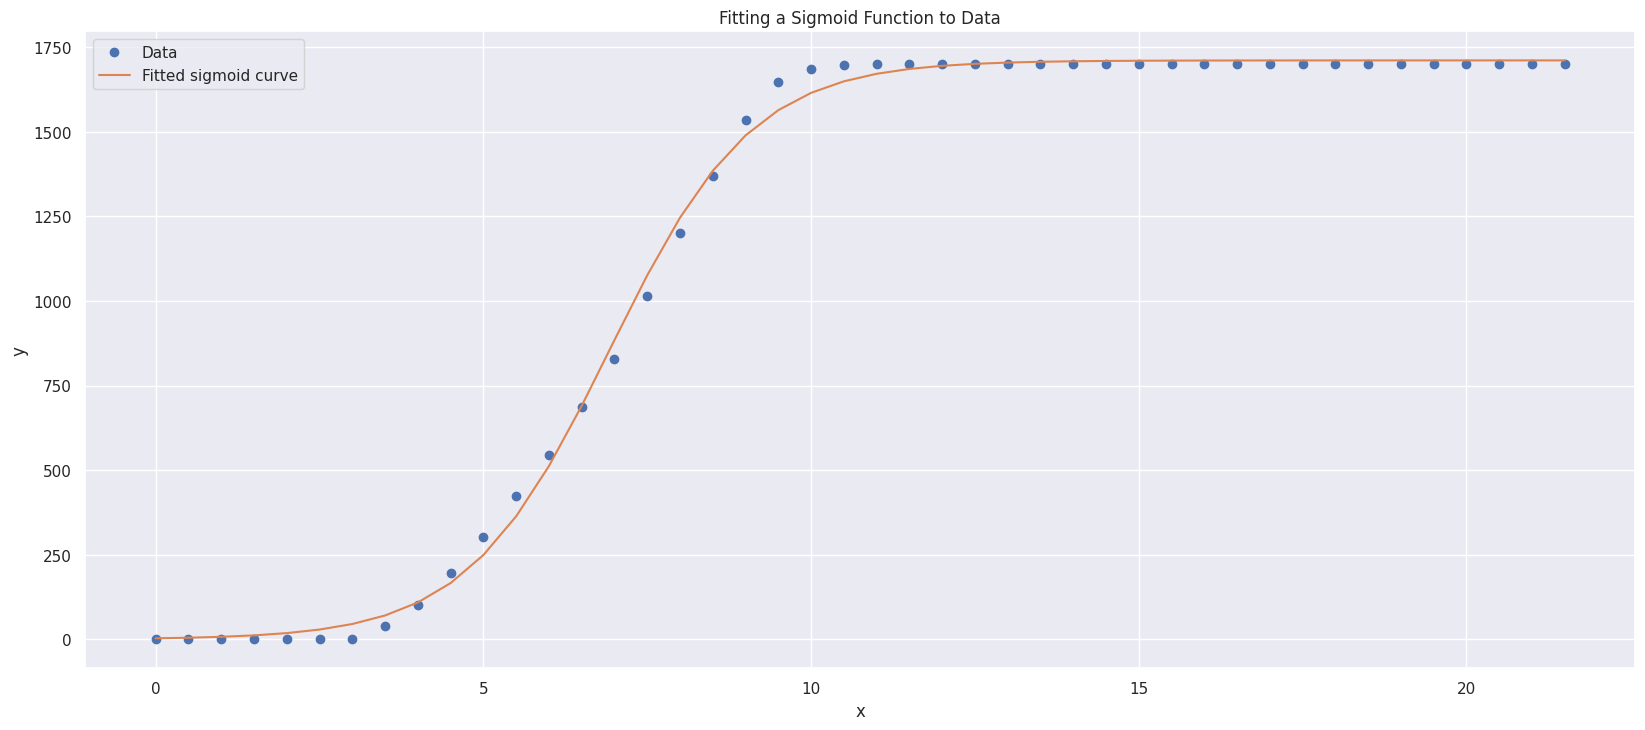

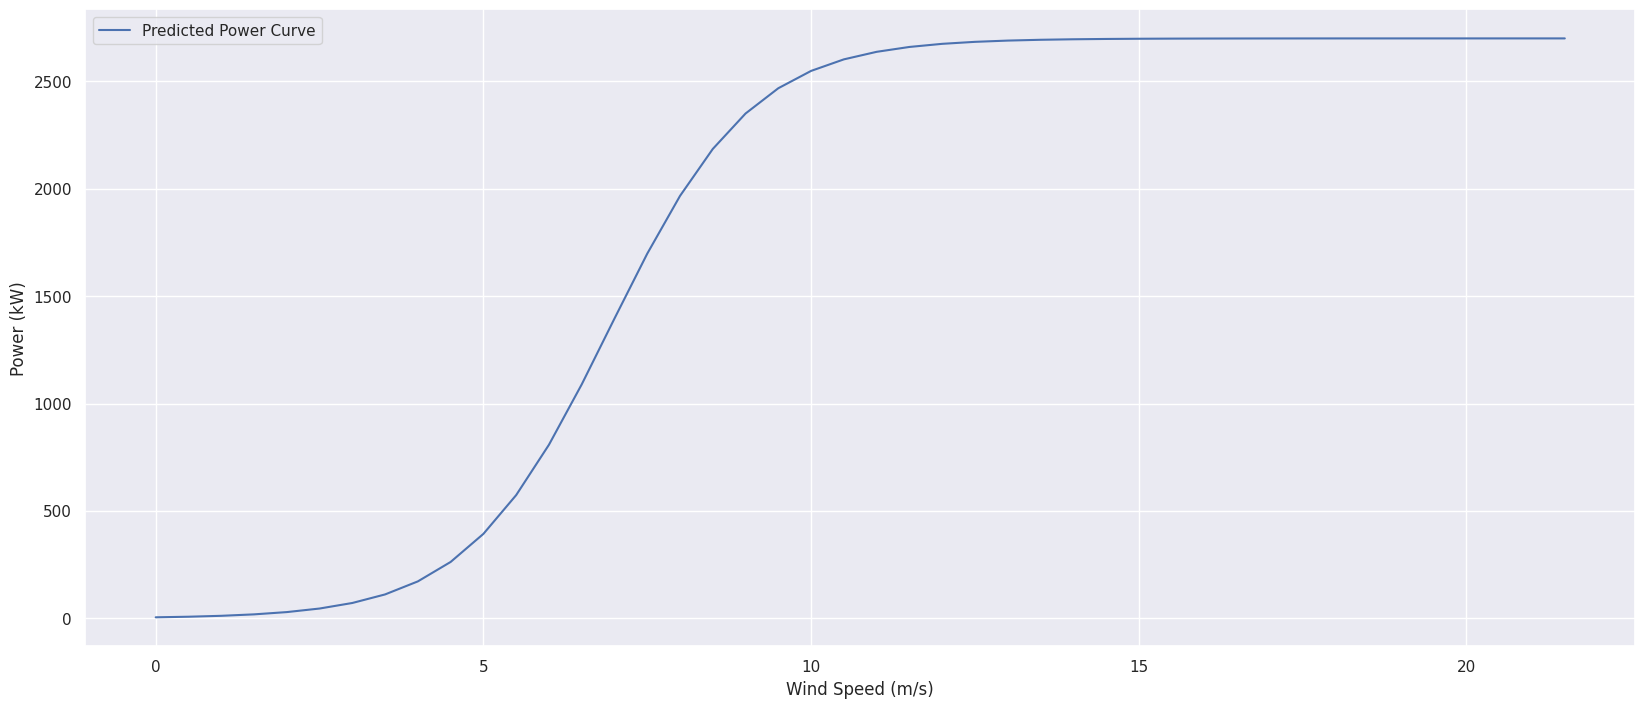

In [ ]:
find_sigmoid_curve("GE Wind", 2700, 0)

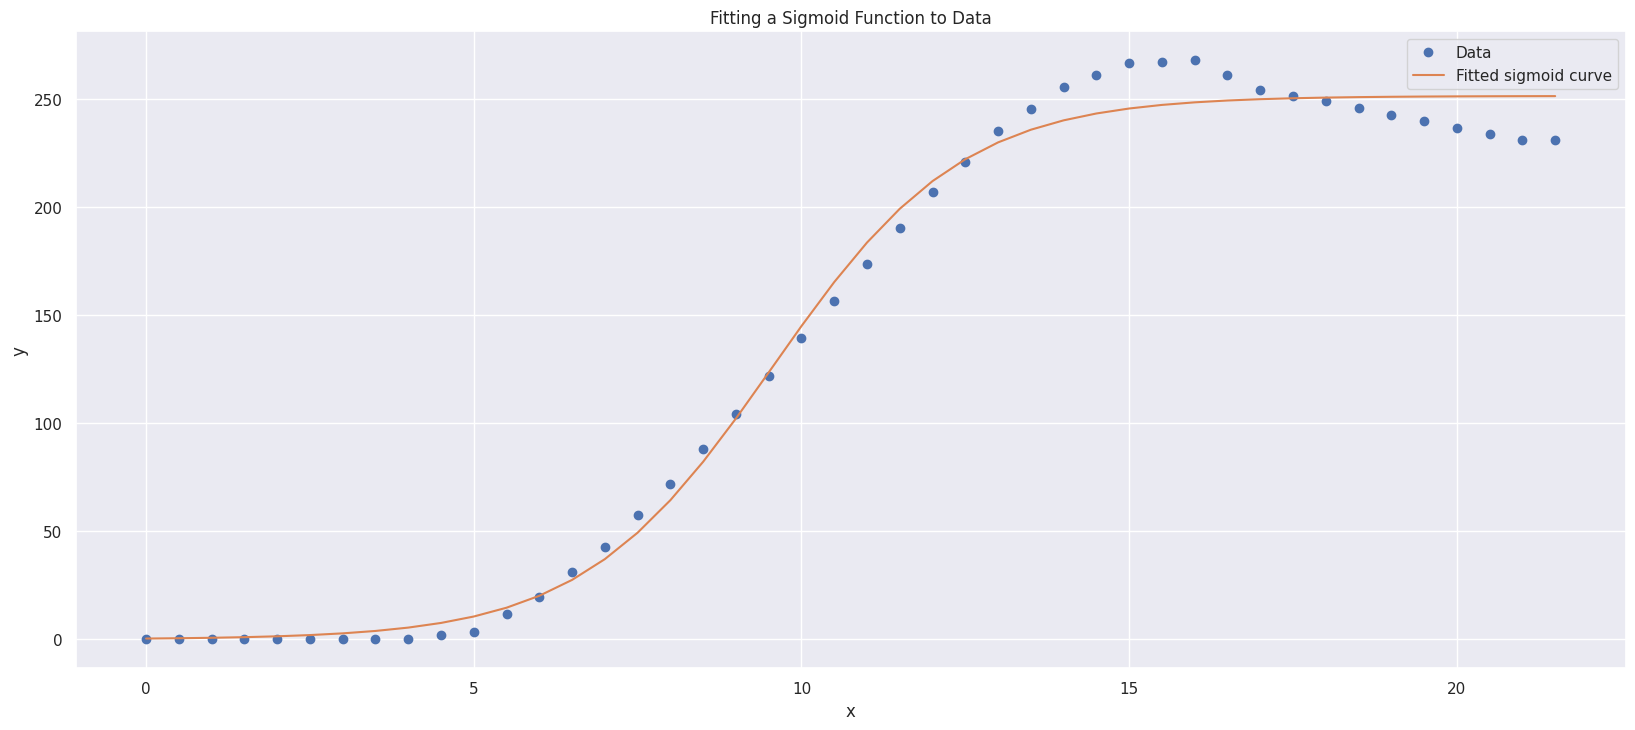

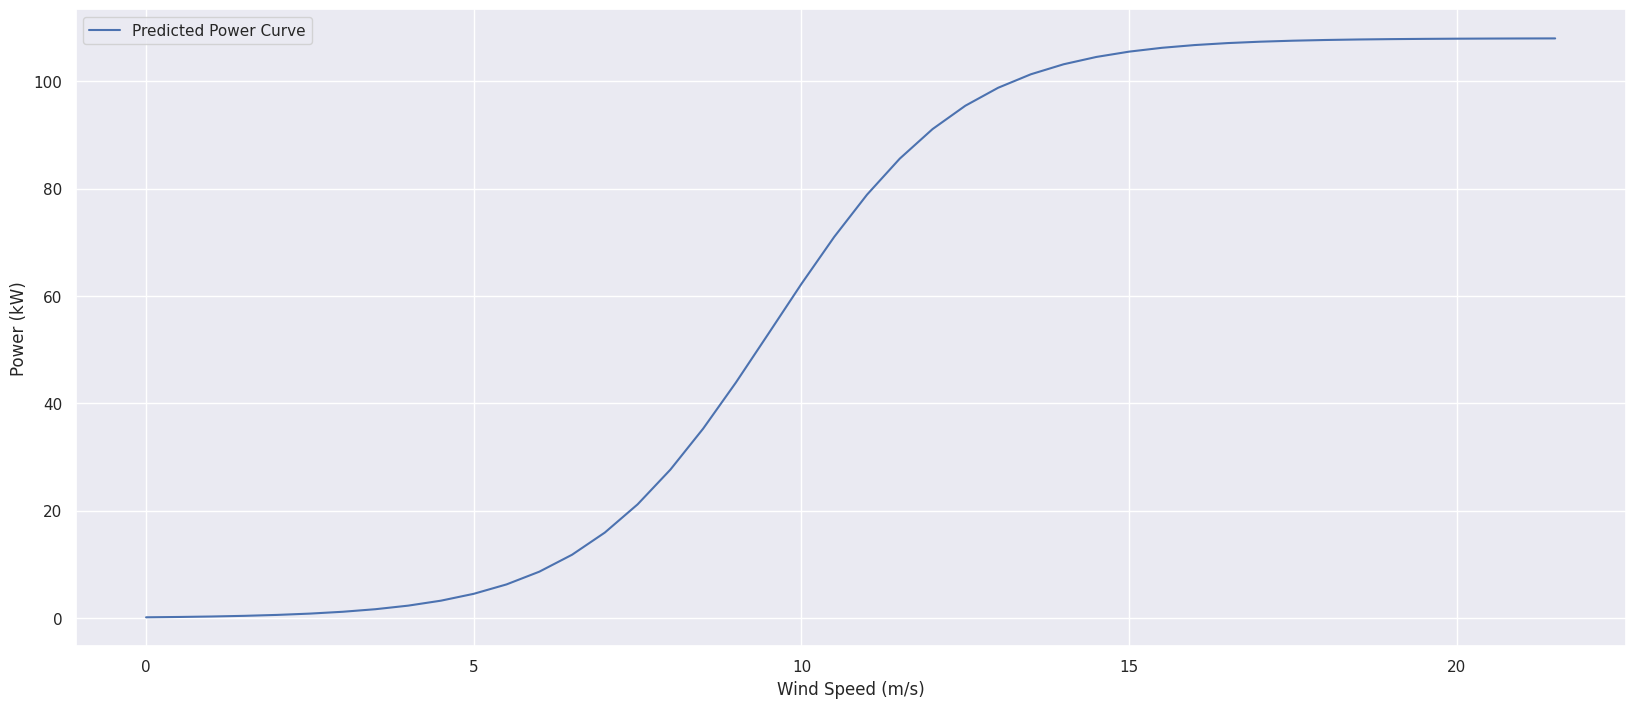

In [ ]:
nm19 = find_sigmoid_curve("NEG Micon", 108, 24)

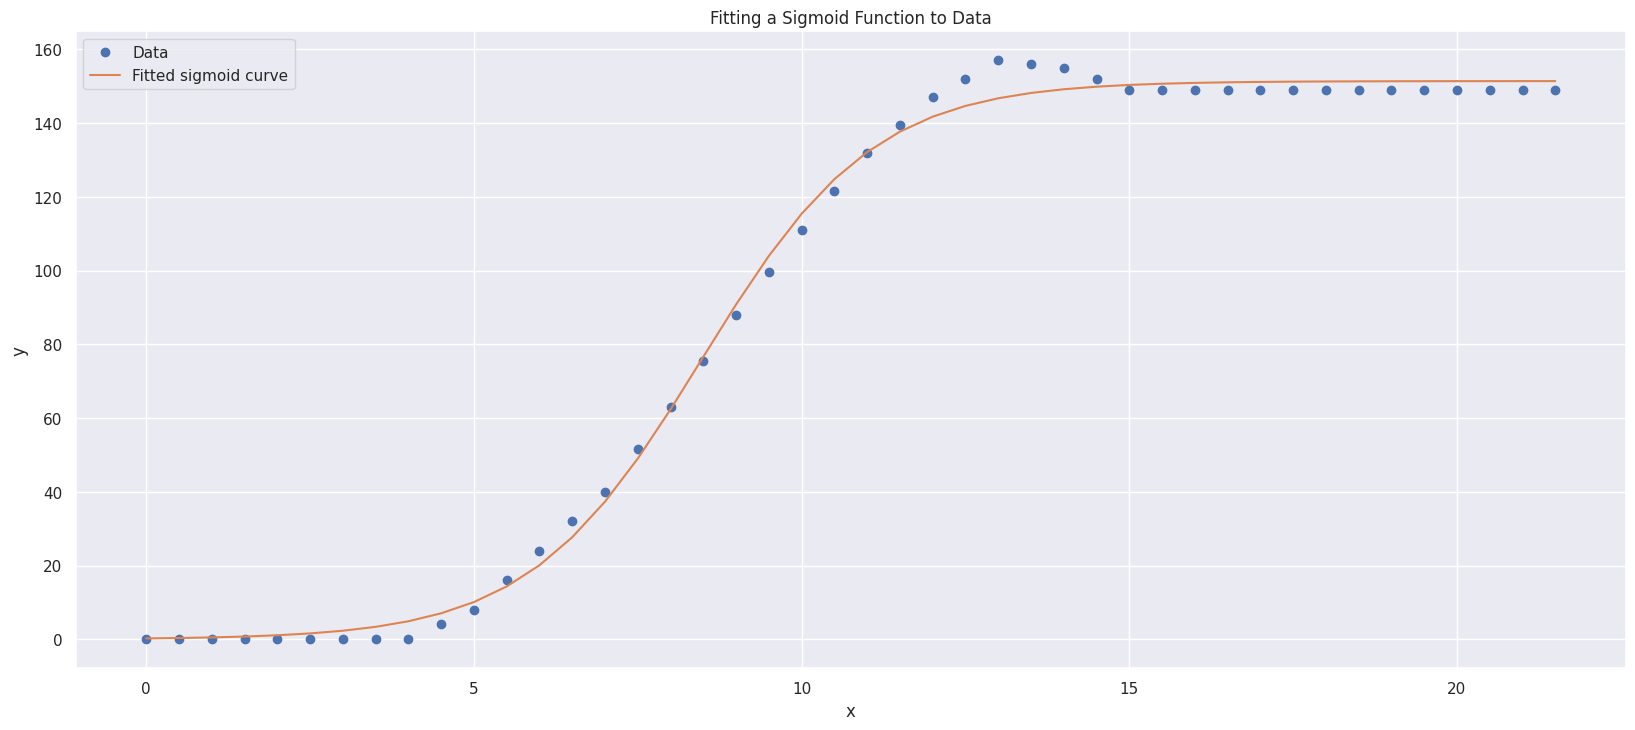

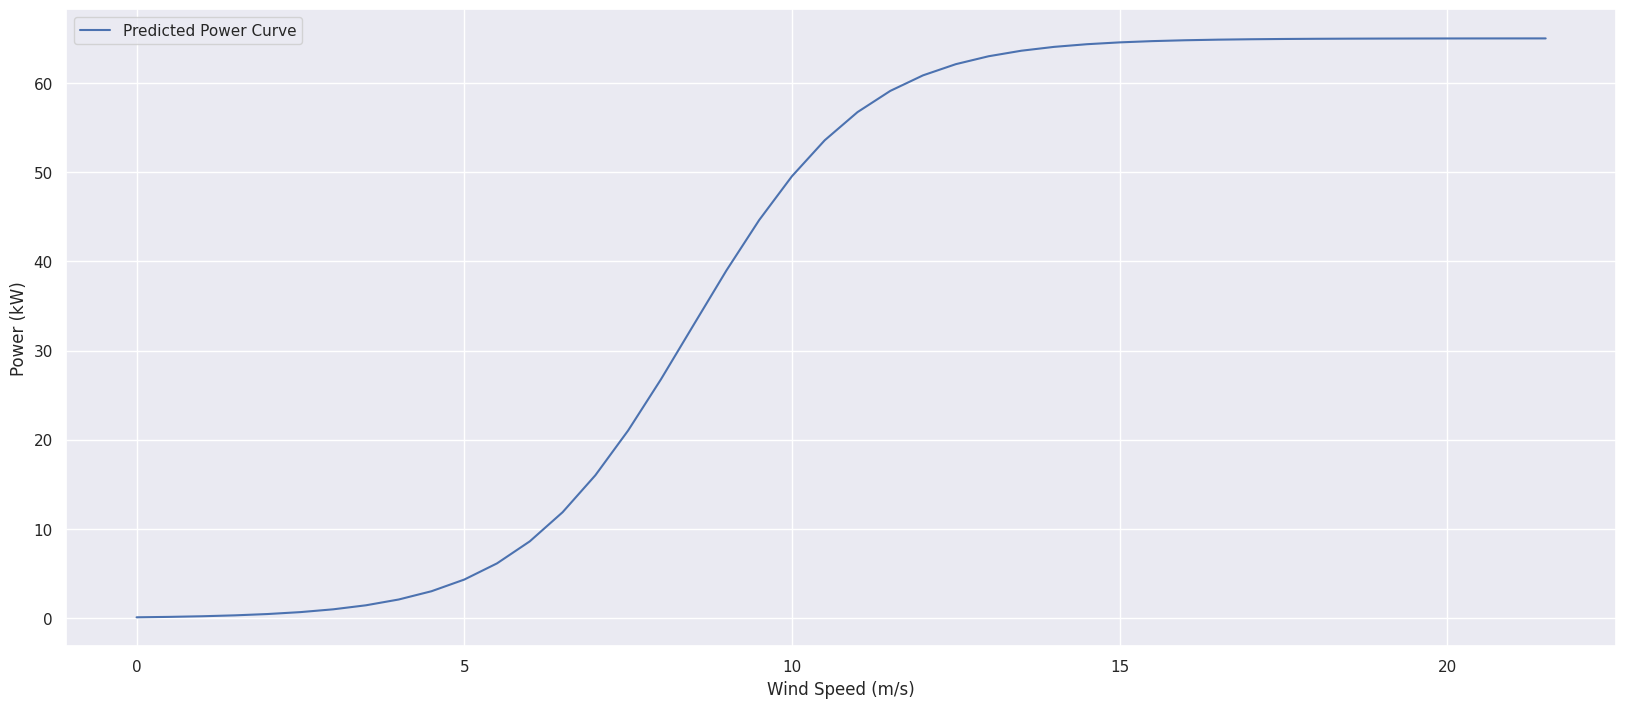

In [ ]:
ntk65 = find_sigmoid_curve("Nordtank", 65, 23)

In [ ]:
i = 0
for x in df.loc[1,'0':'21.5'].index.tolist():
  if float(x) >= 4:
    df.loc[1, x] = nm19[i]# 2.7
  else:
    df.loc[1, x] = 0.0 # 2.7
  i += 1

i = 0
for x in df.loc[1,'0':'21.5'].index.tolist():
  if float(x) >= 4:
    df.loc[19, x] = ntk65[i]# 2.7
  else:
    df.loc[19, x] = 0.0 # 2.7
  i += 1

df

,Manufacturer,Model,Rated Power (kW),Cut-in Wind Speed (m/s),Rated Wind Speed (m/s),Cut-out Wind Speed (m/s),Rotor Diameter (m),Swept Area (m^2),Power Density 1 (W/m^2),Power Density 2 (m^2/kW),...,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5
0,GE Wind,GE1.7-100,1700.0,3.0,10.00,23.0,100.0,7854.00,216.5,4.60,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
1,NEG Micon,NM19,108.0,4.0,14.00,30.0,18.9,280.55,385.7,2.60,...,107.358669,107.544423,107.676538,107.770422,107.837098,107.884430,107.918020,107.941852,107.958759,107.970751
2,Endurance,E-3120,50.0,3.5,10.00,25.0,19.2,290.00,172.4,5.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NEG Micon,NM48,750.0,4.0,16.00,25.0,48.2,1824.00,411.2,2.40,...,749.700000,735.100000,715.500000,706.300000,697.200000,692.900000,683.300000,652.800000,652.800000,652.800000
4,PowerWind,PW56-900,900.0,3.0,12.50,25.0,56.0,2463.00,365.4,2.70,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
5,Aeronautica,47-750,750.0,3.5,14.50,25.0,47.0,1735.00,432.3,2.30,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
6,GE Wind,GE1.5-77,1500.0,3.5,12.00,25.0,77.0,4657.00,322.1,3.10,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
7,GE Wind,GE2.7-116,2700.0,3.0,10.68,24.0,116.0,10660.00,253.3,3.90,...,2699.741866,2699.836936,2699.896993,2699.934931,2699.958897,2699.974036,2699.983599,2699.989640,2699.993456,2699.995866
8,GE Wind,GE2.82-127,2800.0,3.0,8.00,25.0,127.0,12667.00,221.0,4.50,...,2799.732305,2799.830896,2799.893178,2799.932521,2799.957375,2799.973074,2799.982991,2799.989256,2799.993213,2799.995713
9,GE Wind,GE1.85-82.5,1850.0,3.0,13.00,25.0,82.5,5346.00,346.1,2.90,...,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000


In [ ]:
df.drop(16, axis=0,inplace=True)
df

,Manufacturer,Model,Rated Power (kW),Cut-in Wind Speed (m/s),Rated Wind Speed (m/s),Cut-out Wind Speed (m/s),Rotor Diameter (m),Swept Area (m^2),Power Density 1 (W/m^2),Power Density 2 (m^2/kW),...,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5
0,GE Wind,GE1.7-100,1700.0,3.0,10.00,23.0,100.0,7854.00,216.5,4.60,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
1,NEG Micon,NM19,108.0,4.0,14.00,30.0,18.9,280.55,385.7,2.60,...,249.950820,250.383290,250.690878,250.909457,251.064690,251.174887,251.253091,251.308577,251.347940,251.375860
2,Endurance,E-3120,50.0,3.5,10.00,25.0,19.2,290.00,172.4,5.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NEG Micon,NM48,750.0,4.0,16.00,25.0,48.2,1824.00,411.2,2.40,...,749.700000,735.100000,715.500000,706.300000,697.200000,692.900000,683.300000,652.800000,NaN,NaN
4,PowerWind,PW56-900,900.0,3.0,12.50,25.0,56.0,2463.00,365.4,2.70,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
5,Aeronautica,47-750,750.0,3.5,14.50,25.0,47.0,1735.00,432.3,2.30,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
6,GE Wind,GE1.5-77,1500.0,3.5,12.00,25.0,77.0,4657.00,322.1,3.10,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
7,GE Wind,GE2.7-116,2700.0,3.0,10.68,24.0,116.0,10660.00,253.3,3.90,...,2699.741866,2699.836936,2699.896993,2699.934931,2699.958897,2699.974036,2699.983599,2699.989640,2699.993456,2699.995866
8,GE Wind,GE2.82-127,2800.0,3.0,8.00,25.0,127.0,12667.00,221.0,4.50,...,2799.732305,2799.830896,2799.893178,2799.932521,2799.957375,2799.973074,2799.982991,2799.989256,2799.993213,2799.995713
9,GE Wind,GE1.85-82.5,1850.0,3.0,13.00,25.0,82.5,5346.00,346.1,2.90,...,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000


In [ ]:
df.loc[3, '21'] = 652.8
df.loc[3, '21.5'] = 652.8
df

,Manufacturer,Model,Rated Power (kW),Cut-in Wind Speed (m/s),Rated Wind Speed (m/s),Cut-out Wind Speed (m/s),Rotor Diameter (m),Swept Area (m^2),Power Density 1 (W/m^2),Power Density 2 (m^2/kW),...,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5
0,GE Wind,GE1.7-100,1700.0,3.0,10.00,23.0,100.0,7854.00,216.5,4.60,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
1,NEG Micon,NM19,108.0,4.0,14.00,30.0,18.9,280.55,385.7,2.60,...,249.950820,250.383290,250.690878,250.909457,251.064690,251.174887,251.253091,251.308577,251.347940,251.375860
2,Endurance,E-3120,50.0,3.5,10.00,25.0,19.2,290.00,172.4,5.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NEG Micon,NM48,750.0,4.0,16.00,25.0,48.2,1824.00,411.2,2.40,...,749.700000,735.100000,715.500000,706.300000,697.200000,692.900000,683.300000,652.800000,652.800000,652.800000
4,PowerWind,PW56-900,900.0,3.0,12.50,25.0,56.0,2463.00,365.4,2.70,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
5,Aeronautica,47-750,750.0,3.5,14.50,25.0,47.0,1735.00,432.3,2.30,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
6,GE Wind,GE1.5-77,1500.0,3.5,12.00,25.0,77.0,4657.00,322.1,3.10,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
7,GE Wind,GE2.7-116,2700.0,3.0,10.68,24.0,116.0,10660.00,253.3,3.90,...,2699.741866,2699.836936,2699.896993,2699.934931,2699.958897,2699.974036,2699.983599,2699.989640,2699.993456,2699.995866
8,GE Wind,GE2.82-127,2800.0,3.0,8.00,25.0,127.0,12667.00,221.0,4.50,...,2799.732305,2799.830896,2799.893178,2799.932521,2799.957375,2799.973074,2799.982991,2799.989256,2799.993213,2799.995713
9,GE Wind,GE1.85-82.5,1850.0,3.0,13.00,25.0,82.5,5346.00,346.1,2.90,...,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 24
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              24 non-null     object 
 1   Model                     24 non-null     object 
 2   Rated Power (kW)          24 non-null     float64
 3   Cut-in Wind Speed (m/s)   23 non-null     float64
 4   Rated Wind Speed (m/s)    23 non-null     float64
 5   Cut-out Wind Speed (m/s)  23 non-null     float64
 6   Rotor Diameter (m)        23 non-null     float64
 7   Swept Area (m^2)          23 non-null     float64
 8   Power Density 1 (W/m^2)   23 non-null     float64
 9   Power Density 2 (m^2/kW)  23 non-null     float64
 10  Hub Height (m)            22 non-null     object 
 11  0                         23 non-null     float64
 12  0.5                       23 non-null     float64
 13  1                         23 non-null     float64
 14  1.5              

In [ ]:
neg_micon19 = df[df['Model'] == 'NM19']
neg_micon19

,Manufacturer,Model,Rated Power (kW),Cut-in Wind Speed (m/s),Rated Wind Speed (m/s),Cut-out Wind Speed (m/s),Rotor Diameter (m),Swept Area (m^2),Power Density 1 (W/m^2),Power Density 2 (m^2/kW),...,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5
1,NEG Micon,NM19,108.0,4.0,14.0,30.0,18.9,280.55,385.7,2.6,...,107.358669,107.544423,107.676538,107.770422,107.837098,107.88443,107.91802,107.941852,107.958759,107.970751


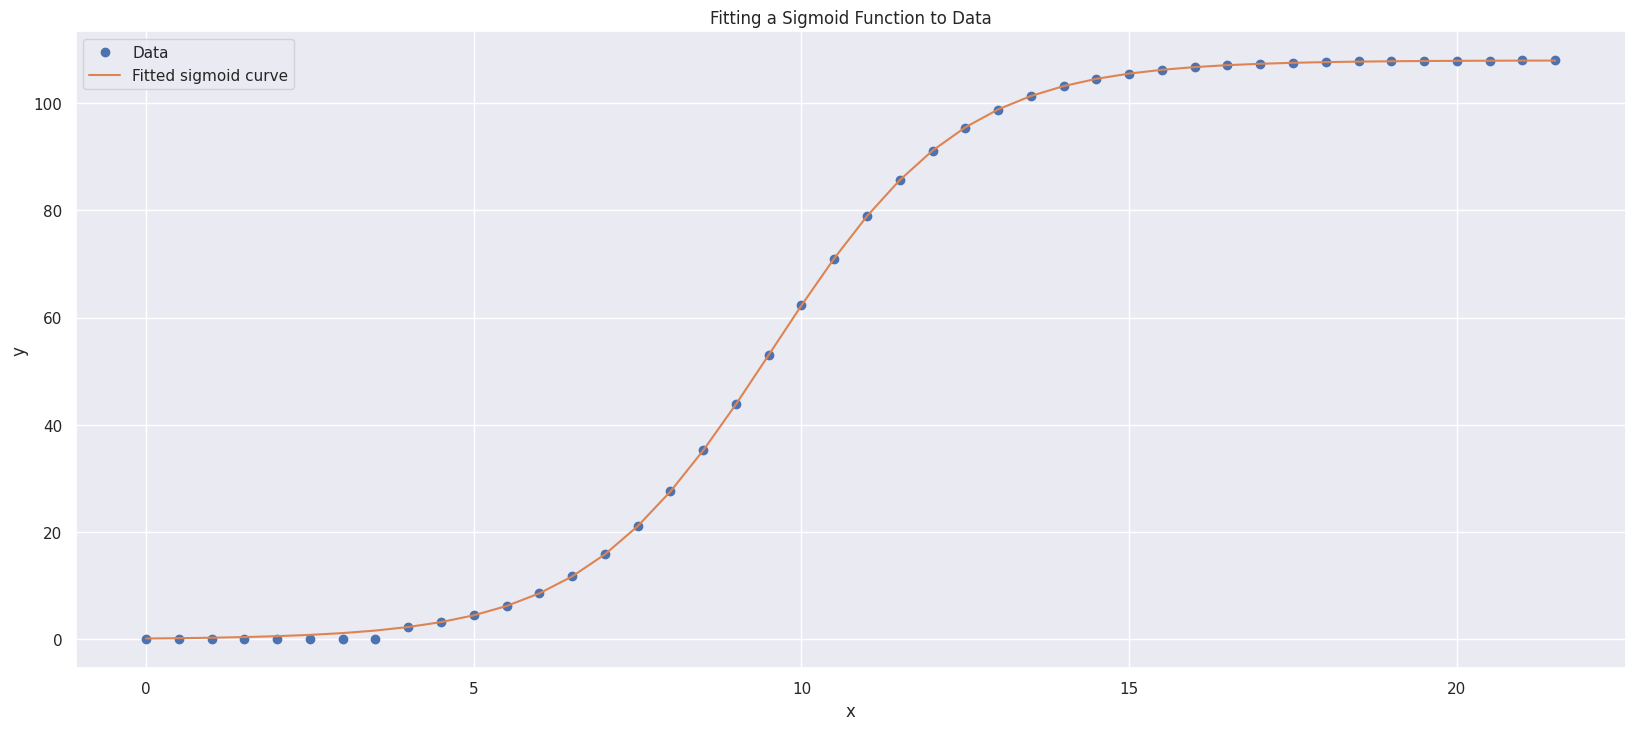

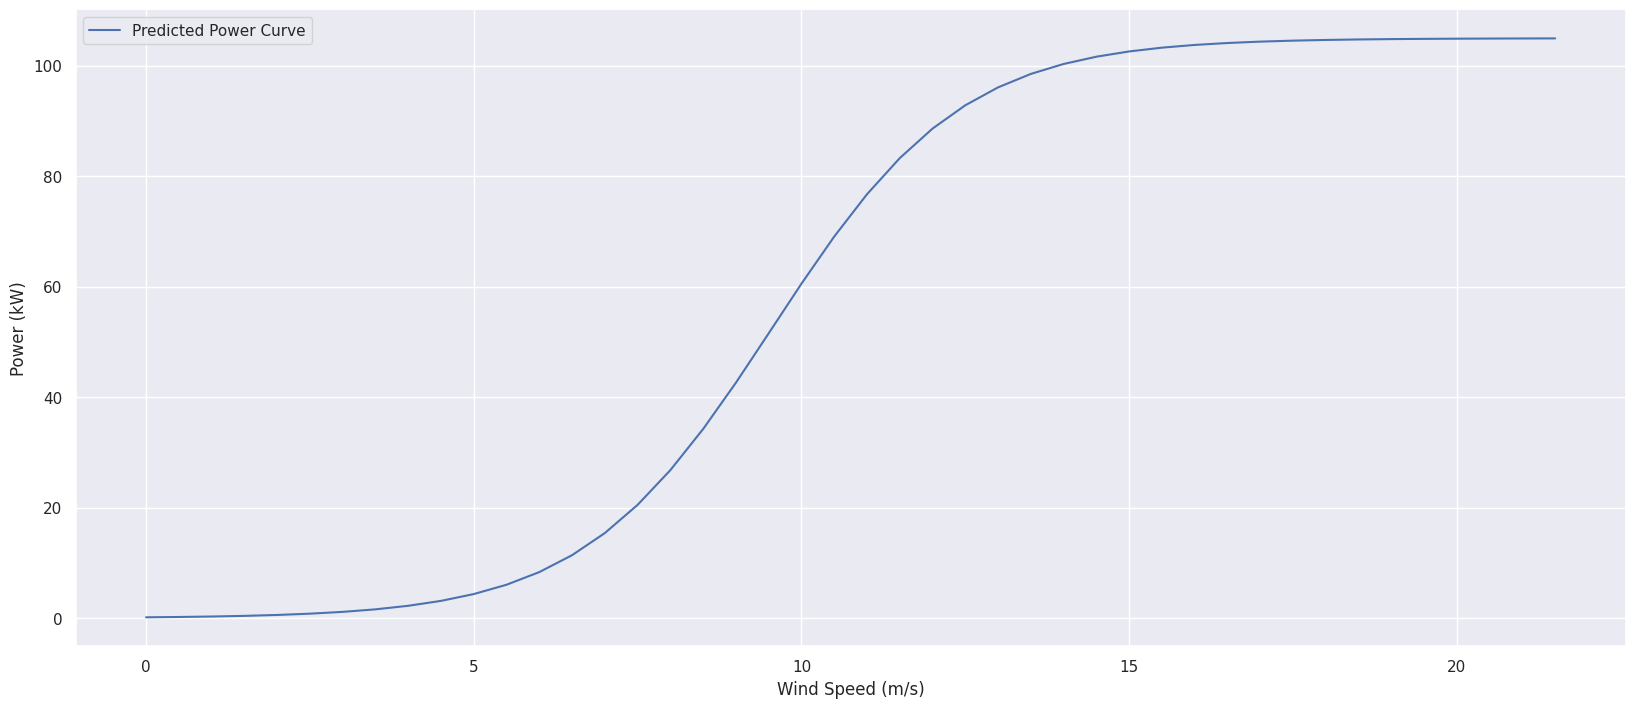

,Manufacturer,Model,Rated Power (kW),Cut-in Wind Speed (m/s),Rated Wind Speed (m/s),Cut-out Wind Speed (m/s),Rotor Diameter (m),Swept Area (m^2),Power Density 1 (W/m^2),Power Density 2 (m^2/kW),...,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5
0,GE Wind,GE1.7-100,1700.0,3.0,10.00,23.0,100.0,7854.00,216.5,4.60,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
1,NEG Micon,NM19,108.0,4.0,14.00,30.0,18.9,280.55,385.7,2.60,...,107.358669,107.544423,107.676538,107.770422,107.837098,107.884430,107.918020,107.941852,107.958759,107.970751
2,Endurance,E-3120,50.0,3.5,10.00,25.0,19.2,290.00,172.4,5.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NEG Micon,NM48,750.0,4.0,16.00,25.0,48.2,1824.00,411.2,2.40,...,749.700000,735.100000,715.500000,706.300000,697.200000,692.900000,683.300000,652.800000,652.800000,652.800000
4,PowerWind,PW56-900,900.0,3.0,12.50,25.0,56.0,2463.00,365.4,2.70,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
5,Aeronautica,47-750,750.0,3.5,14.50,25.0,47.0,1735.00,432.3,2.30,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
6,GE Wind,GE1.5-77,1500.0,3.5,12.00,25.0,77.0,4657.00,322.1,3.10,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
7,GE Wind,GE2.7-116,2700.0,3.0,10.68,24.0,116.0,10660.00,253.3,3.90,...,2699.741866,2699.836936,2699.896993,2699.934931,2699.958897,2699.974036,2699.983599,2699.989640,2699.993456,2699.995866
8,GE Wind,GE2.82-127,2800.0,3.0,8.00,25.0,127.0,12667.00,221.0,4.50,...,2799.732305,2799.830896,2799.893178,2799.932521,2799.957375,2799.973074,2799.982991,2799.989256,2799.993213,2799.995713
9,GE Wind,GE1.85-82.5,1850.0,3.0,13.00,25.0,82.5,5346.00,346.1,2.90,...,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000


In [ ]:
temp_df = df[df.Manufacturer == 'Wincon']
# x_vals = [float(x) for x in temp_df.loc[0,'0':'21.5'].index.tolist()] # GE
x_vals = [float(x) for x in neg_micon19.loc[1,'0':'21.5'].index.tolist()] # NEG Micon
# x_vals = [float(x) for x in temp_df.loc[0,'0':'21.5'].index.tolist()]
# y_vals = temp_df.loc[0,'0':'21.5'].tolist() # GE
y_vals = neg_micon19.loc[1,'0':'21.5'].tolist() # NEG Micon
# y_vals = temp_df.loc[26,'0':'21.5'].tolist() # Nordtank

# Initial guess for parameters
initial_guess = [max(y_vals), 0.1, 10.0]  # Adjust these values as needed

# Perform curve fitting
popt, pcov = curve_fit(sigmoid, x_vals, y_vals, p0=initial_guess)

# Extract fitted parameters
L_fit, k_fit, x0_fit = popt

# Generate y values using the fitted parameters
y_fit = sigmoid(x_vals, L_fit, k_fit, x0_fit)

# Plot the original data and the fitted sigmoid curve
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, y_fit, label='Fitted sigmoid curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting a Sigmoid Function to Data')
plt.legend()
plt.grid(True)
plt.show()

new_power_curve = sigmoid(x_vals, 105, k_fit, x0_fit)
plt.plot(x_vals, new_power_curve, label='Predicted Power Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

i = 0
df.loc[21, 'Cut-in Wind Speed (m/s)'] = 4
df.loc[21, 'Rated Wind Speed (m/s)'] = 14
df.loc[21, 'Cut-out Wind Speed (m/s)'] = 30
for x in df.loc[21,'0':'21.5'].index.tolist():
  if float(x) >= 4:
    df.loc[21, x] = new_power_curve[i]# 2.7
  else:
    df.loc[21, x] = 0.0 # 2.7
  i += 1

df

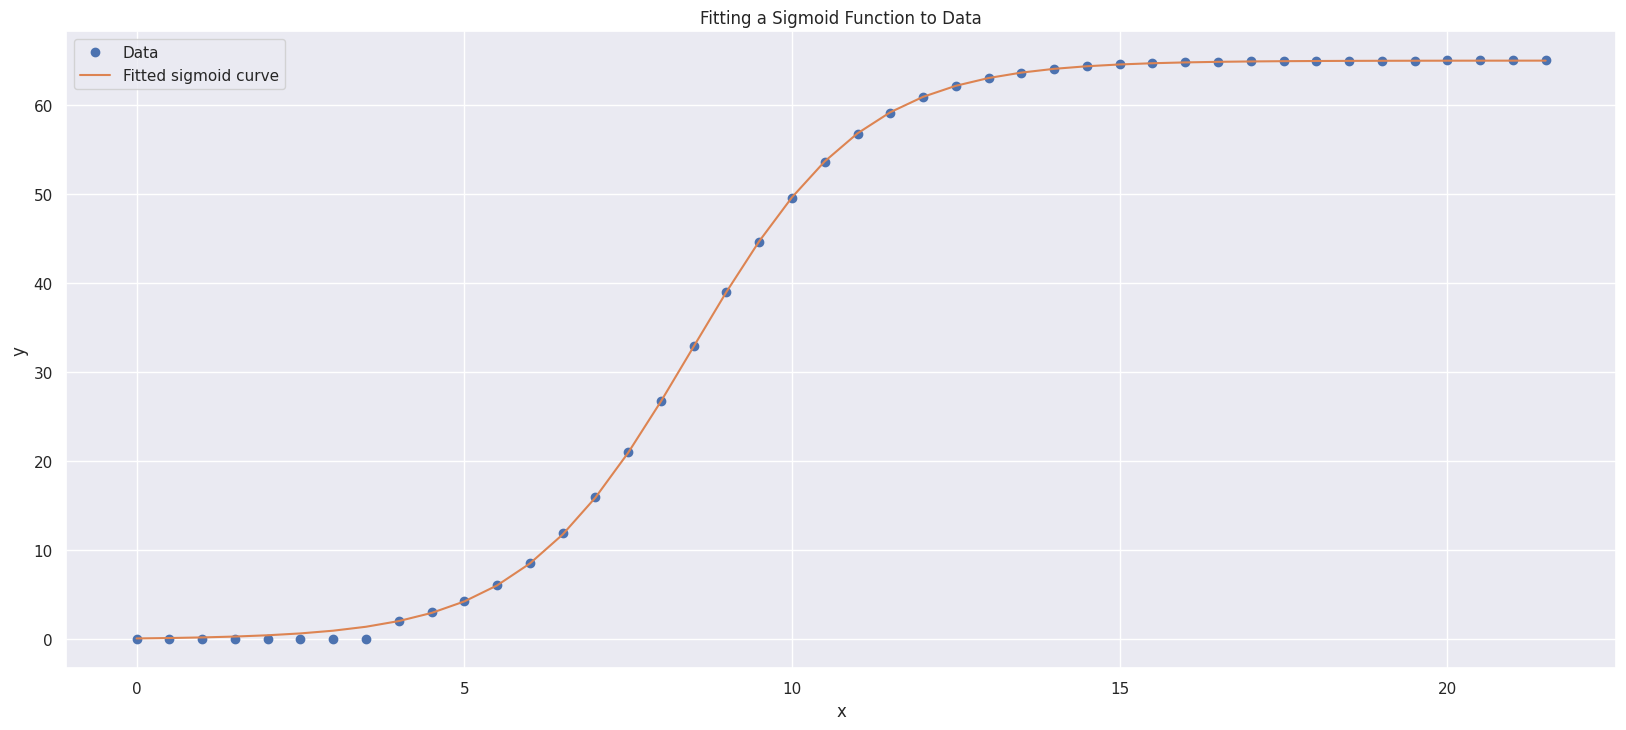

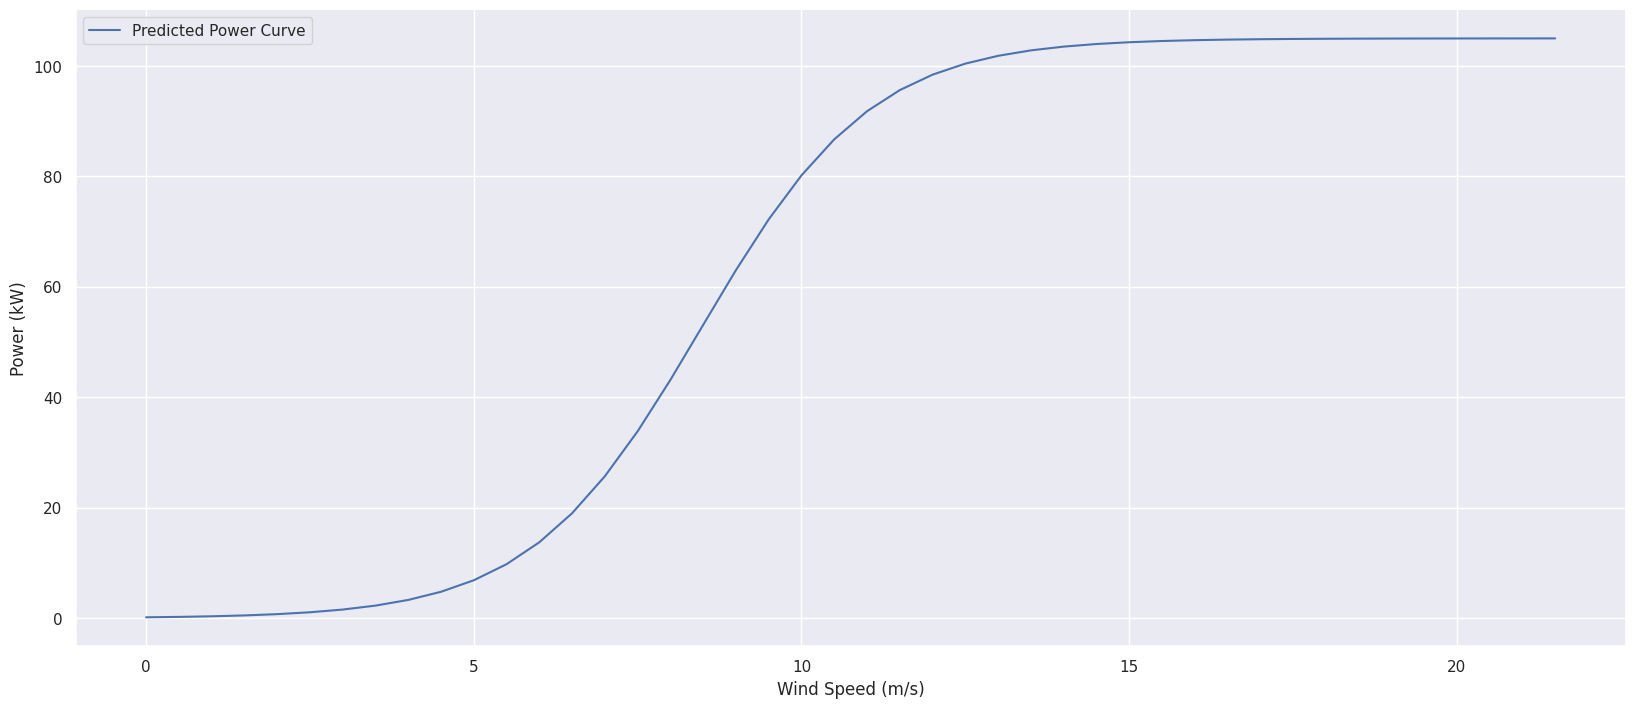

,Manufacturer,Model,Rated Power (kW),Cut-in Wind Speed (m/s),Rated Wind Speed (m/s),Cut-out Wind Speed (m/s),Rotor Diameter (m),Swept Area (m^2),Power Density 1 (W/m^2),Power Density 2 (m^2/kW),...,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5
0,GE Wind,GE1.7-100,1700.0,3.0,10.00,23.0,100.0,7854.00,216.5,4.60,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
1,NEG Micon,NM19,108.0,4.0,14.00,30.0,18.9,280.55,385.7,2.60,...,107.358669,107.544423,107.676538,107.770422,107.837098,107.884430,107.918020,107.941852,107.958759,107.970751
2,Endurance,E-3120,50.0,3.5,10.00,25.0,19.2,290.00,172.4,5.80,...,104.848473,104.896671,104.929548,104.951969,104.967257,104.977680,104.984785,104.989629,104.992931,104.995182
3,NEG Micon,NM48,750.0,4.0,16.00,25.0,48.2,1824.00,411.2,2.40,...,749.700000,735.100000,715.500000,706.300000,697.200000,692.900000,683.300000,652.800000,652.800000,652.800000
4,PowerWind,PW56-900,900.0,3.0,12.50,25.0,56.0,2463.00,365.4,2.70,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
5,Aeronautica,47-750,750.0,3.5,14.50,25.0,47.0,1735.00,432.3,2.30,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
6,GE Wind,GE1.5-77,1500.0,3.5,12.00,25.0,77.0,4657.00,322.1,3.10,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
7,GE Wind,GE2.7-116,2700.0,3.0,10.68,24.0,116.0,10660.00,253.3,3.90,...,2699.741866,2699.836936,2699.896993,2699.934931,2699.958897,2699.974036,2699.983599,2699.989640,2699.993456,2699.995866
8,GE Wind,GE2.82-127,2800.0,3.0,8.00,25.0,127.0,12667.00,221.0,4.50,...,2799.732305,2799.830896,2799.893178,2799.932521,2799.957375,2799.973074,2799.982991,2799.989256,2799.993213,2799.995713
9,GE Wind,GE1.85-82.5,1850.0,3.0,13.00,25.0,82.5,5346.00,346.1,2.90,...,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000


In [ ]:
neg_micon19 = df[df['Model'] == 'NTK65']
neg_micon19

temp_df = df[df.Manufacturer == 'Endurance']
# x_vals = [float(x) for x in temp_df.loc[0,'0':'21.5'].index.tolist()] # GE
x_vals = [float(x) for x in neg_micon19.loc[19,'0':'21.5'].index.tolist()] # NEG Micon
# x_vals = [float(x) for x in temp_df.loc[0,'0':'21.5'].index.tolist()]
# y_vals = temp_df.loc[0,'0':'21.5'].tolist() # GE
y_vals = neg_micon19.loc[19,'0':'21.5'].tolist() # NEG Micon
# y_vals = temp_df.loc[26,'0':'21.5'].tolist() # Nordtank

# Initial guess for parameters
initial_guess = [max(y_vals), 0.1, 10.0]  # Adjust these values as needed

# Perform curve fitting
popt, pcov = curve_fit(sigmoid, x_vals, y_vals, p0=initial_guess)

# Extract fitted parameters
L_fit, k_fit, x0_fit = popt

# Generate y values using the fitted parameters
y_fit = sigmoid(x_vals, L_fit, k_fit, x0_fit)

# Plot the original data and the fitted sigmoid curve
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, y_fit, label='Fitted sigmoid curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting a Sigmoid Function to Data')
plt.legend()
plt.grid(True)
plt.show()

new_power_curve = sigmoid(x_vals, 105, k_fit, x0_fit)
plt.plot(x_vals, new_power_curve, label='Predicted Power Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

i = 0
for x in df.loc[2,'0':'21.5'].index.tolist():
  if float(x) >= 3.5:
    df.loc[2, x] = new_power_curve[i]# 2.7
  else:
    df.loc[2, x] = 0.0 # 2.7
  i += 1

df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 24
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              24 non-null     object 
 1   Model                     24 non-null     object 
 2   Rated Power (kW)          24 non-null     float64
 3   Cut-in Wind Speed (m/s)   24 non-null     float64
 4   Rated Wind Speed (m/s)    24 non-null     float64
 5   Cut-out Wind Speed (m/s)  24 non-null     float64
 6   Rotor Diameter (m)        23 non-null     float64
 7   Swept Area (m^2)          23 non-null     float64
 8   Power Density 1 (W/m^2)   23 non-null     float64
 9   Power Density 2 (m^2/kW)  23 non-null     float64
 10  Hub Height (m)            22 non-null     object 
 11  0                         24 non-null     float64
 12  0.5                       24 non-null     float64
 13  1                         24 non-null     float64
 14  1.5              

In [ ]:
df.to_csv('/content/drive/My Drive/CS 663 - Project/Imputed_Turbine_Energy.csv')

We checked that everything is filled in, so we exported the imputed energy information to a new CSV and consider this task completed!